<a href="https://colab.research.google.com/github/NanThanThanSoe/OfflineHandwrittenRecognition/blob/master/%5BNan%5DMLHW3Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 2 [3 points]

Develop deep learning models using convolution neural network to classify all 120 fruits of the Fruit-Images Dataset published by Horea94. You should develop at least one models and compare its performance with the paper [1]. Note: You must not use transfer learning in this question.
- Datasource: https://github.com/Horea94/Fruit-Images-Dataset
- Paper: [1] H. Mureşan and M. Oltean, “Fruit recognition from images using deep learning,” Acta Universitatis Sapientiae, Informatica, vol. 10, no. 1, pp. 26–42, Aug. 2018, doi: 10.2478/ausi-2018-0002.

In [1]:
pip install -U keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [2]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git

fatal: destination path 'Fruit-Images-Dataset' already exists and is not an empty directory.


In [3]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import glob

import keras.utils
from keras import utils as np_utils
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [4]:
print(os.listdir("/content/Fruit-Images-Dataset"))

['.git', 'src', 'Training', 'Test', 'papers', 'test-multiple_fruits', 'LICENSE', 'readme.md']


In [0]:
# training data
train_images = []       
train_labels = []
shape = (28, 28)  
train_path = '/content/Fruit-Images-Dataset/Training/*'

for fruit_dir_path in glob.glob("/content/Fruit-Images-Dataset/Training/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, shape)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        train_images.append(image)
        train_labels.append(fruit_label)
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [0]:
train_label_dict = {v:i for i,v in enumerate(np.unique(train_labels))}
label_dict = {v: k for k, v in train_label_dict.items()}

In [7]:
label_dict

{0: 'Apple Braeburn',
 1: 'Apple Crimson Snow',
 2: 'Apple Golden 1',
 3: 'Apple Golden 2',
 4: 'Apple Golden 3',
 5: 'Apple Granny Smith',
 6: 'Apple Pink Lady',
 7: 'Apple Red 1',
 8: 'Apple Red 2',
 9: 'Apple Red 3',
 10: 'Apple Red Delicious',
 11: 'Apple Red Yellow 1',
 12: 'Apple Red Yellow 2',
 13: 'Apricot',
 14: 'Avocado',
 15: 'Avocado ripe',
 16: 'Banana',
 17: 'Banana Lady Finger',
 18: 'Banana Red',
 19: 'Beetroot',
 20: 'Blueberry',
 21: 'Cactus fruit',
 22: 'Cantaloupe 1',
 23: 'Cantaloupe 2',
 24: 'Carambula',
 25: 'Cauliflower',
 26: 'Cherry 1',
 27: 'Cherry 2',
 28: 'Cherry Rainier',
 29: 'Cherry Wax Black',
 30: 'Cherry Wax Red',
 31: 'Cherry Wax Yellow',
 32: 'Chestnut',
 33: 'Clementine',
 34: 'Cocos',
 35: 'Dates',
 36: 'Eggplant',
 37: 'Ginger Root',
 38: 'Granadilla',
 39: 'Grape Blue',
 40: 'Grape Pink',
 41: 'Grape White',
 42: 'Grape White 2',
 43: 'Grape White 3',
 44: 'Grape White 4',
 45: 'Grapefruit Pink',
 46: 'Grapefruit White',
 47: 'Guava',
 48: 'Haze

In [0]:
label_ids = np.array([train_label_dict[x] for x in train_labels])

In [9]:
print(train_images.shape, train_labels.shape, label_ids.shape)

(61488, 28, 28, 3) (61488,) (61488,)


In [0]:
# testing data
test_images = []       
test_labels = []
shape = (28, 28)  
train_path = '/content/Fruit-Images-Dataset/Test/*'

for fruit_dir_path in glob.glob("/content/Fruit-Images-Dataset/Test/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, shape)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        test_images.append(image)
        test_labels.append(fruit_label)
test_images = np.array(test_images)

In [0]:
val_label_ids = np.array([train_label_dict[x] for x in test_labels])

In [12]:
print(test_images.shape, val_label_ids.shape)

(20622, 28, 28, 3) (20622,)


In [0]:
X_train, X_test = train_images, test_images
Y_train, Y_test = label_ids, val_label_ids

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
X_flat_train = X_train.reshape(X_train.shape[0], 28*28*3)
X_flat_test = X_test.reshape(X_test.shape[0], 28*28*3)

In [16]:
train_labels = pd.get_dummies(train_labels).values
print(train_labels.shape)

(61488, 120)


In [0]:
Y_train = keras.utils.to_categorical(Y_train, 120)
Y_test = keras.utils.to_categorical(Y_test, 120)

In [18]:
print('Original Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print('Flattened:', X_flat_train.shape, X_flat_test.shape)

Original Sizes: (61488, 28, 28, 3) (20622, 28, 28, 3) (61488, 120) (20622, 120)
Flattened: (61488, 2352) (20622, 2352)


(28, 28, 3)


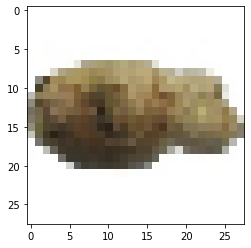

In [19]:
print(X_train[0].shape)
plt.imshow(X_train[0])
plt.show()

In [20]:
# Creting first CNN model
model= Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(28,28,3,)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dropout(rate=0.5) )
model.add(Dense(150, activation='relu'))
model.add(Dense(120,activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               2764950   
_________________________________________________________________
dense_2 (Dense)              (None, 120)               18120     
Total params: 2,788,158
Trainable params: 2,788,158
Non-trainable params: 0
____________________________________________

In [0]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [22]:
history_dense = model.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=1, validation_data=(X_test, Y_test))

Train on 61488 samples, validate on 20622 samples
Epoch 1/5
61488/61488 [==============================] - 114s 2ms/step - loss: 0.5391 - acc: 0.8688 - val_loss: 0.2566 - val_acc: 0.9161
Epoch 2/5
61488/61488 [==============================] - 114s 2ms/step - loss: 0.0307 - acc: 0.9911 - val_loss: 0.3372 - val_acc: 0.9103
Epoch 3/5
61488/61488 [==============================] - 113s 2ms/step - loss: 0.0253 - acc: 0.9931 - val_loss: 0.3697 - val_acc: 0.9165
Epoch 4/5
61488/61488 [==============================] - 113s 2ms/step - loss: 0.0225 - acc: 0.9932 - val_loss: 0.2522 - val_acc: 0.9409
Epoch 5/5
61488/61488 [==============================] - 113s 2ms/step - loss: 0.0128 - acc: 0.9966 - val_loss: 0.2434 - val_acc: 0.9476


In [30]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2433999519875714
Test accuracy: 0.9476287364959717


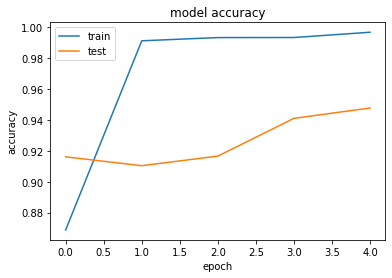

In [24]:
# summarize history for accuracy
plt.plot(history_dense.history['acc'])
plt.plot(history_dense.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

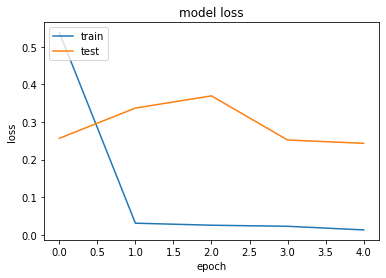

In [25]:
# summarize history for loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# Creting second CNN model
model_cnn= Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,3,)))
model_cnn.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model_cnn.add(MaxPool2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dropout(rate=0.5) )
model_cnn.add(Dense(120,activation = 'softmax'))

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)              

In [27]:
model_cnn.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')
result = model_cnn.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=1, validation_data=(X_test, Y_test))

Train on 61488 samples, validate on 20622 samples
Epoch 1/5
61488/61488 [==============================] - 176s 3ms/step - loss: 1.1433 - acc: 0.7023 - val_loss: 0.2154 - val_acc: 0.9350
Epoch 2/5
61488/61488 [==============================] - 176s 3ms/step - loss: 0.1406 - acc: 0.9550 - val_loss: 0.1764 - val_acc: 0.9533
Epoch 3/5
61488/61488 [==============================] - 175s 3ms/step - loss: 0.0781 - acc: 0.9743 - val_loss: 0.1213 - val_acc: 0.9652
Epoch 4/5
61488/61488 [==============================] - 175s 3ms/step - loss: 0.0623 - acc: 0.9793 - val_loss: 0.0966 - val_acc: 0.9733
Epoch 5/5
61488/61488 [==============================] - 174s 3ms/step - loss: 0.0562 - acc: 0.9817 - val_loss: 0.1246 - val_acc: 0.9658


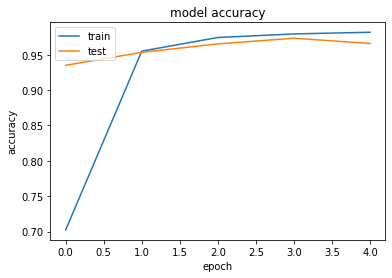

In [28]:
# summarize history for accuracy
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

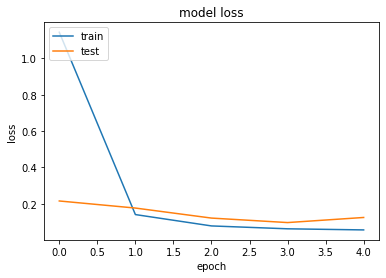

In [29]:
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()